In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("final_cleaned_dataset.csv")

In [3]:
df = df.dropna()

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Host Since,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Calendar Updated,Availability 60,Review Scores Rating,Cancellation Policy,Reviews per Month,Entire home/apt,apartment,bed_breakfast,hoster,house,other,Amenities : Air conditioning,Amenities : Self Check-In,Amenities : Buzzer/wireless intercom,Amenities : Outlet covers,Amenities : Paid parking off premises,Amenities : Room-darkening shades,Amenities : TV,Amenities : Elevator in building,Amenities : Carbon monoxide detector,Amenities : Wireless Internet,Amenities : Window guards,Amenities : Washer / Dryer,Amenities : Iron,Amenities : Smartlock,Amenities : Doorman Entry,Amenities : Breakfast,Amenities : Essentials,Amenities : Other pet(s),Amenities : Wheelchair accessible,Amenities : Private living room,Amenities : Baby bath,Amenities : Laptop friendly workspace,Amenities : Lockbox,Amenities : Game console,Amenities : Smoke detector,Amenities : Gym,Amenities : Baby monitor,Amenities : Keypad,Amenities : Fireplace guards,Amenities : Free parking on street,Amenities : Changing table,Amenities : Free parking on premises,Amenities : Pool,Amenities : Children’s dinnerware,Amenities : Children’s books and toys,Amenities : Crib,Amenities : Table corner guards,Amenities : Hair dryer,Amenities : Fire extinguisher,Amenities : Private entrance,Amenities : Internet,Amenities : Smoking allowed,Amenities : Hangers,Amenities : Dog(s),Amenities : Safety card,Amenities : Stair gates,Amenities : First aid kit,Amenities : High chair,Amenities : Bathtub,Amenities : Washer,Amenities : Pets allowed,Amenities : Cat(s),Amenities : Family/kid friendly,Amenities : translation missing: en.hosting_amenity_49,Amenities : Pack ’n Play/travel crib,Amenities : Shampoo,Amenities : Hot tub,Amenities : Dryer,Amenities : Indoor fireplace,Amenities : 24-hour check-in,Amenities : Suitable for events,Amenities : Babysitter recommendations,Amenities : Pets live on this property,Amenities : translation missing: en.hosting_amenity_50,Amenities : Heating,Amenities : Doorman,Amenities : Cable TV,Amenities : Lock on bedroom door,Amenities : Kitchen,Host Verifications : weibo,Host Verifications : phone,Host Verifications : sesame,Host Verifications : manual_online,Host Verifications : kba,Host Verifications : reviews,Host Verifications : amex,Host Verifications : linkedin,Host Verifications : email,Host Verifications : selfie,Host Verifications : None,Host Verifications : facebook,Host Verifications : offline_government_id,Host Verifications : government_id,Host Verifications : google,Host Verifications : photographer,Host Verifications : manual_offline,Host Verifications : work_email,Host Verifications : sent_id,Features : Instant Bookable,Features : Require Guest Phone Verification,Features : Host Identity Verified,Features : Require Guest Profile Picture,Features : Is Location Exact,Features : Host Has Profile Pic,Features : Host Is Superhost,Neighbourhood Cleansed : Palais-Bourbon,Neighbourhood Cleansed : Reuilly,Neighbourhood Cleansed : Buttes-Chaumont,Neighbourhood Cleansed : Louvre,Neighbourhood Cleansed : Gobelins,Neighbourhood Cleansed : Bourse,Neighbourhood Cleansed : Panthéon,Neighbourhood Cleansed : Batignolles-Monceau,Neighbourhood Cleansed : Luxembourg,Neighbourhood Cleansed : Entrepôt,Neighbourhood Cleansed : Opéra,Neighbourhood Cleansed : Ménilmontant,Neighbourhood Cleansed : Élysée,Neighbourhood Cleansed : Temple,Neighbourhood Cleansed : Observatoire,Neighbourhood Cleansed : Popincourt,Neighbourhood Cleansed : Vaugirard,Neighbourhood Cleansed : Passy,Neighbourhood Cleansed : Buttes-Montmartre,Neighbourhood Cleansed : Hôtel-de-Ville,30 nearest POI average
0,1884.0,2,1.0,1.0,1.0,1,50.0,500.0,30.0,1,0,4,15,80.0,0,0.16,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
df.columns[0:20]

Index(['Host Since', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Calendar Updated',
       'Availability 60', 'Review Scores Rating', 'Cancellation Policy',
       'Reviews per Month', 'Entire home/apt', 'apartment', 'bed_breakfast',
       'hoster'],
      dtype='object')

# Preprocessing

> Les éléments utilisés dans la fonction objective d'un algorithme d'apprentissage (comme le noyau des machines à vecteurs de support ou les régularisateurs L1 et L2 des modèles linéaires) **supposent** que toutes les **entités sont centrées autour de zéro et ont une variance dans le même ordre**. Si une caractéristique a une variance de plusieurs ordres de grandeur plus grande que d'autres, elle pourrait dominer la fonction objective et empêcher l'estimateur d'apprendre correctement des autres caractéristiques comme prévu.

> Ici les variables quantitatives sont : 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 60', 'Reviews per Month', 'Calendar Updated (in days)',
       'Host since (in days)', 'Number of Amenities',
       'Number of host verifications', 'Global review score', '30 nearest'


> Les variables catégoriels sont : 'District',
       'Type of property', 'Type of Room', 'Real Bed', 'Cancellation_Policy',
       'Superhost', 'Host profile pic', 'Host ID verified', 'Instant bookable',
       'lat', 'lon'

In [6]:
from sklearn import preprocessing
import numpy as np

In [263]:
X1_ = df[['Host Since', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Security Deposit', 'Cleaning Fee','Guests Included', 'Extra People', 'Calendar Updated',
       'Availability 60', 'Review Scores Rating','Reviews per Month', '30 nearest POI average']]

In [264]:
numeric_variables = ['Host Since', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Security Deposit', 'Cleaning Fee','Guests Included', 'Extra People', 'Calendar Updated',
       'Availability 60', 'Review Scores Rating','Reviews per Month', '30 nearest POI average','Price']

X2_ = df.drop(columns=numeric_variables)

In [265]:
Y_ = df['Price']

In [266]:
X1_.shape, X2_.shape, Y_.shape, df.shape # 17 + 8 + 1 = 28 - 2 OK 

((40028, 14), (40028, 123), (40028,), (40028, 138))

In [267]:
X1, Y, X2 = preprocessing.scale(X1_), preprocessing.scale(Y_), X2_.copy()

In [16]:
X = np.concatenate((X1,X2), axis=1)

In [17]:
X.shape, Y.shape

((40028, 137), (40028,))

In [18]:
X_ = X1_.join(X2_) # utile pour avoir le nom des colonnes de X

# 1 : Régression linéaire simple

In [19]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Les variables quantitative sont centrés-réduites, les variables catégorielles et issues d'un one-hot-enconding sont laissées tels quels

 ## Essayons un modèle de regression linéaire

In [21]:
from sklearn import linear_model

In [22]:
reg = linear_model.LinearRegression()

In [23]:
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
len(reg.coef_[np.abs(reg.coef_) > 0.05])

81

In [25]:
np.abs(reg.coef_).argsort()[-82:]

array([ 65,  28,  11,  54,  41, 110,  39,  74, 108, 104,  94, 113,  67,
        88,  87,  90,  29, 111,  45,  10,   6,  78, 116,  70,  82,  69,
        76,  57,  79,  80,  48, 109,  50,  58,  32,   2,  91,   1,  96,
        27, 106,   3,  93,  22,  16,  55,  36,  95,  83,  35,  23,  44,
        42,  49,  26,  97,  51, 125, 136, 117, 120, 129, 130, 123, 122,
       134, 127, 133, 124, 131, 126, 132, 118, 135, 121, 128, 119,  21,
        20,  18,  17,  19])

In [48]:
reg.coef_[[130, 123, 122,134, 127, 133, 124, 131, 126, 132, 118, 135, 121, 128, 119,  21,
        20,  18,  17,  19]]

array([-2.59892352e+10, -2.59892352e+10, -2.59892352e+10, -2.59892352e+10,
       -2.59892352e+10, -2.59892352e+10, -2.59892352e+10, -2.59892352e+10,
       -2.59892352e+10, -2.59892352e+10, -2.59892352e+10, -2.59892352e+10,
       -2.59892352e+10, -2.59892352e+10, -2.59892352e+10, -2.33647620e+11,
       -2.33647620e+11, -2.33647620e+11, -2.33647620e+11, -2.33647620e+11])

In [26]:
X_.columns[[130, 123, 122,134, 127, 133, 124, 131, 126, 132, 118, 135, 121, 128, 119,  21,
        20,  18,  17,  19]]

Index(['Neighbourhood Cleansed : Temple', 'Neighbourhood Cleansed : Panthéon',
       'Neighbourhood Cleansed : Bourse', 'Neighbourhood Cleansed : Passy',
       'Neighbourhood Cleansed : Opéra', 'Neighbourhood Cleansed : Vaugirard',
       'Neighbourhood Cleansed : Batignolles-Monceau',
       'Neighbourhood Cleansed : Observatoire',
       'Neighbourhood Cleansed : Entrepôt',
       'Neighbourhood Cleansed : Popincourt',
       'Neighbourhood Cleansed : Reuilly',
       'Neighbourhood Cleansed : Buttes-Montmartre',
       'Neighbourhood Cleansed : Gobelins',
       'Neighbourhood Cleansed : Ménilmontant',
       'Neighbourhood Cleansed : Buttes-Chaumont', 'other', 'house',
       'bed_breakfast', 'apartment', 'hoster'],
      dtype='object')

Les colonnes suivantes sont les plus significatives par ordre croissant:
> 'Neighbourhood Cleansed : Reuilly',
       'Neighbourhood Cleansed : Buttes-Montmartre',
       'Neighbourhood Cleansed : Gobelins',
       'Neighbourhood Cleansed : Ménilmontant',
       'Neighbourhood Cleansed : Buttes-Chaumont', 'other', 'house',
       'bed_breakfast', 'apartment', 'hoster'

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [30]:
Y_pred = reg.predict(X_test)

In [31]:
print(f'Mean squared error: {mean_squared_error(Y_test, Y_pred):.2f}')
# R²
print(f'Coefficient of determination: {r2_score(Y_test, Y_pred):.2f}')

Mean squared error: 23416921674824156.00
Coefficient of determination: -23577914256100744.00


## Regression Ridge + Lasso : Elastic Net

(repris et traduit de la doc scikit-learn)
> La régression Ridge résout certains des problèmes de la regression simple des moindres carrés ordinaires en imposant une pénalité à la taille des coefficients. Les coefficients de pénalité L2/Ridge minimisent une somme résiduelle de carrés pénalisée.

>La régression Lasso est un modèle linéaire qui estime des coefficient potentiellement non signficatif. Il est utile dans certains contextes en raison de sa tendance à préférer des solutions avec moins de coefficients non nuls, réduisant efficacement le nombre de caractéristiques dont dépend la solution donnée.

> Elastic Net est un mélange des deux : la fonction Objectif à minimiser devient :

 $$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$

Pour determiner les meilleurs coefficient **alpha** et **rho** nous utiliserons des modèles de validations croisés 

In [137]:
from sklearn.linear_model import ElasticNetCV

In [214]:
reg_ENCV = ElasticNetCV(l1_ratio=0.7, random_state = 42, cv=5)

In [215]:
reg_ENCV.fit(X_train, Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.7, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=42, selection='cyclic', tol=0.0001, verbose=0)

In [216]:
reg_ENCV.coef_

array([ 0.00366242,  0.24111533,  0.20056331,  0.23154205,  0.01433254,
       -0.00217532,  0.10821492,  0.0070309 , -0.01394575, -0.        ,
        0.10289145,  0.05279794, -0.04517653,  0.01049672, -0.01789597,
        0.01764362,  0.29812565, -0.09873863,  0.        , -0.28863854,
        0.01131826,  0.12099317,  0.32951271,  0.        ,  0.0046516 ,
       -0.        , -0.        ,  0.        ,  0.0445482 ,  0.0926408 ,
        0.01858243,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.0992308 ,  0.        , -0.00754074,  0.        ,
       -0.00911245,  0.        , -0.        , -0.01414117, -0.        ,
       -0.        , -0.02154888,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.01686451,
        0.01995793, -0.00775057, -0.02770077, -0.03549407,  0.0092255 ,
        0.        ,  0.00892818, -0.        , -0.01011816, -0.  

**la régression est moitié ridge/moitié lasso**

In [217]:
reg_ENCV.l1_ratio

0.7

In [218]:
reg_ENCV.alpha_

0.000889831384406344

In [253]:
len(np.abs(reg_ENCV.coef_)[np.abs(reg_ENCV.coef_) > 0.1]) # nombre de coef > 0.1 en valeur absolue

31

In [254]:
np.abs(reg_ENCV.coef_).argsort()[-32:]

array([ 36,  10,   6, 124, 131, 126, 134, 123,  21, 132, 122,  79,  80,
        82,  95, 118,   2, 135, 130, 121,   3,   1,  19,  16, 128, 120,
        22, 119, 129, 136, 117, 125])

In [255]:
coef = pd.DataFrame(reg_ENCV.coef_[[36,  10,   6, 124, 131, 126, 134, 123,  21, 132, 122,  79,  80,
        82,  95, 118,   2, 135, 130, 121,   3,   1,  19,  16, 128, 120,
        22, 119, 129, 136, 117, 125]], columns=['Coefficients'])

In [256]:
names = pd.DataFrame(X_.columns[[36,  10,   6, 124, 131, 126, 134, 123,  21, 132, 122,  79,  80,
        82,  95, 118,   2, 135, 130, 121,   3,   1,  19,  16, 128, 120,
        22, 119, 129, 136, 117, 125]], columns=['Variables'])

In [257]:
importance = pd.concat([names,coef],axis=1, sort=False)

In [258]:
importance

,Variables,Coefficients
0,Amenities : Doorman Entry,0.099231
1,Availability 60,0.102891
2,Cleaning Fee,0.108215
3,Neighbourhood Cleansed : Batignolles-Monceau,-0.109877
4,Neighbourhood Cleansed : Observatoire,-0.112184
5,Neighbourhood Cleansed : Entrepôt,-0.115229
6,Neighbourhood Cleansed : Passy,0.116145
7,Neighbourhood Cleansed : Panthéon,0.120598
8,other,0.120993
9,Neighbourhood Cleansed : Popincourt,-0.123297


Les colonnes suivantes les plus signficatives par ordre croissant :
> 'Bathrooms', 'Accommodates', 'Bedrooms', 'hoster',
       'Amenities : Air conditioning', 'Neighbourhood Cleansed : Ménilmontant',
       'Entire home/apt', 'Neighbourhood Cleansed : Buttes-Chaumont',
       'Neighbourhood Cleansed : Louvre', 'Neighbourhood Cleansed : Élysée',
       'Neighbourhood Cleansed : Palais-Bourbon',
       'Neighbourhood Cleansed : Hôtel-de-Ville',
       'Neighbourhood Cleansed : Luxembourg'

84 features, reduction of 38.69%


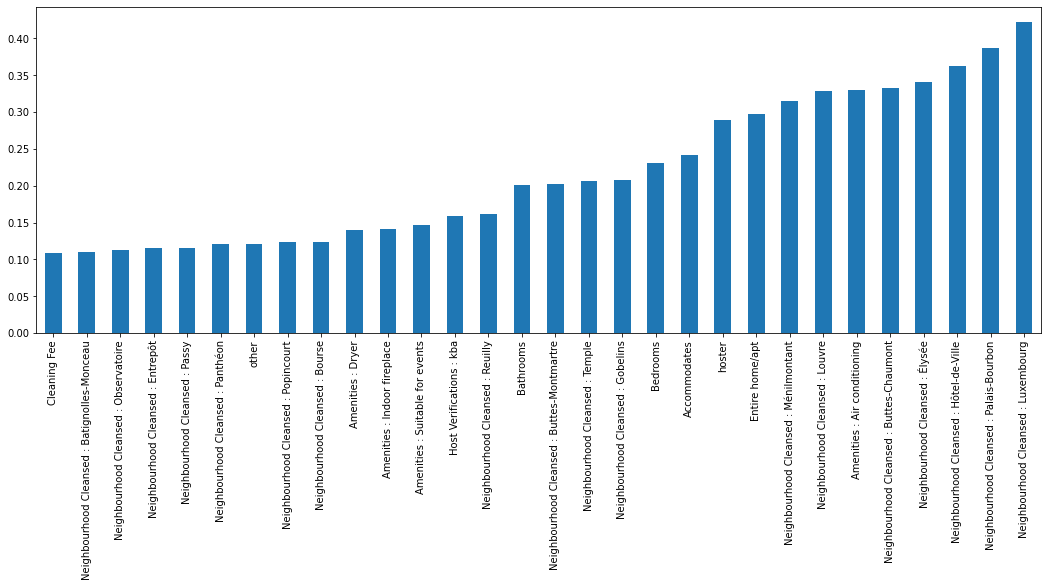

In [262]:
from matplotlib import pyplot as plt
feature_importance = pd.Series(index = X_.columns, data = np.abs(reg_ENCV.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

plt.show()

In [223]:
Y2_pred = reg_ENCV.predict(X_test)

In [224]:
print(f'Mean squared error: {mean_squared_error(reg_ENCV.predict(X_train), Y_train):.2f}')
# R²
print(f'Coefficient of determination: {r2_score(reg_ENCV.predict(X_train), Y_train):.2f}')

Mean squared error: 0.37
Coefficient of determination: 0.42


In [225]:
print(f'Mean squared error: {mean_squared_error(Y_test, Y2_pred):.2f}')
# R²
print(f'Coefficient of determination: {r2_score(Y_test, Y2_pred):.2f}')

Mean squared error: 0.34
Coefficient of determination: 0.64


# Réseau de Neurone

Comme les réseaux de neurone sont très sensible à l'ordre de grandeurs des valeurs, on normalise aussi les variables catégorielles

In [268]:
X2 = preprocessing.scale(X2_)

In [269]:
X = np.concatenate((X1,X2), axis=1)

In [301]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [302]:
from sklearn.neural_network import MLPRegressor

In [303]:
clf = MLPRegressor(hidden_layer_sizes=(50,30), verbose=True, max_iter=1000)

In [304]:
clf.fit(X_train, Y_train)

Iteration 1, loss = 0.27019908
Iteration 2, loss = 0.17124195
Iteration 3, loss = 0.15511777
Iteration 4, loss = 0.14784672
Iteration 5, loss = 0.14256149
Iteration 6, loss = 0.13572820
Iteration 7, loss = 0.13017845
Iteration 8, loss = 0.12719550
Iteration 9, loss = 0.12297663
Iteration 10, loss = 0.12131796
Iteration 11, loss = 0.11715844
Iteration 12, loss = 0.11453664
Iteration 13, loss = 0.11303061
Iteration 14, loss = 0.11117557
Iteration 15, loss = 0.10605316
Iteration 16, loss = 0.10366389
Iteration 17, loss = 0.10103209
Iteration 18, loss = 0.09894017
Iteration 19, loss = 0.09760915
Iteration 20, loss = 0.09433387
Iteration 21, loss = 0.09177776
Iteration 22, loss = 0.09007111
Iteration 23, loss = 0.08885635
Iteration 24, loss = 0.08714275
Iteration 25, loss = 0.08566637
Iteration 26, loss = 0.08369014
Iteration 27, loss = 0.08234899
Iteration 28, loss = 0.08076081
Iteration 29, loss = 0.07964703
Iteration 30, loss = 0.07988664
Iteration 31, loss = 0.07693652
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 30), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [305]:
Y_pred = clf.predict(X_test)

In [306]:
print(f'Mean squared error: {mean_squared_error(Y_test, Y_pred):.2f}')
# R²
print(f'Coefficient of determination: {r2_score(Y_test, Y_pred):.2f}')

Mean squared error: 0.35
Coefficient of determination: 0.64


In [298]:
clf2 = MLPRegressor(hidden_layer_sizes=(60,40,20), verbose=True, max_iter=1000)

In [299]:
clf2.fit(X_train, Y_train)

Iteration 1, loss = 0.25686245
Iteration 2, loss = 0.16145350
Iteration 3, loss = 0.14786076
Iteration 4, loss = 0.13532306
Iteration 5, loss = 0.12752308
Iteration 6, loss = 0.12172081
Iteration 7, loss = 0.11581575
Iteration 8, loss = 0.11249642
Iteration 9, loss = 0.10552136
Iteration 10, loss = 0.10085269
Iteration 11, loss = 0.09806690
Iteration 12, loss = 0.09487275
Iteration 13, loss = 0.09175348
Iteration 14, loss = 0.08838081
Iteration 15, loss = 0.08734041
Iteration 16, loss = 0.08461254
Iteration 17, loss = 0.08106917
Iteration 18, loss = 0.07785024
Iteration 19, loss = 0.07803054
Iteration 20, loss = 0.07597592
Iteration 21, loss = 0.07335509
Iteration 22, loss = 0.07159957
Iteration 23, loss = 0.06939447
Iteration 24, loss = 0.06835958
Iteration 25, loss = 0.06675102
Iteration 26, loss = 0.06556783
Iteration 27, loss = 0.06484395
Iteration 28, loss = 0.06348556
Iteration 29, loss = 0.06280307
Iteration 30, loss = 0.06224662
Iteration 31, loss = 0.06088506
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(60, 40, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [300]:
Y_pred = clf.predict(X_test)
print(f'Mean squared error: {mean_squared_error(Y_test, Y_pred):.2f}')
# R²
print(f'Coefficient of determination: {r2_score(Y_test, Y_pred):.2f}')
print(f'Mean absolute error: {mean_absolute_error(Y_test, Y_pred):.2f}')


Mean squared error: 0.30
Coefficient of determination: 0.68
Mean absolute error: 0.25
